#***Importando dados***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIRBNB/listings.csv')

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20230328184454,2023-03-29,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates applies for Ne...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.90,4.77,4.65,NaN,f,1,1,0,0,1.86
1,200568,https://www.airbnb.com/rooms/200568,20230328184454,2023-03-29,city scrape,30m of Ipa Beach e fins de semana special price !,"ATENÇÃO, a eletricidade e gás são pagas pelo h...","Praia, restaurantes, boates, centros culturais...",https://a0.muscache.com/pictures/0586b774-3641...,980805,...,4.97,4.95,4.73,NaN,f,6,4,2,0,1.45
2,202778,https://www.airbnb.com/rooms/202778,20230328184454,2023-03-29,city scrape,Best Studio in Rio - Copacabana,If you looking to staying in a beautiful moder...,Besides Copacabana been the most famous touris...,https://a0.muscache.com/pictures/2015102/18eea...,529105,...,4.94,4.85,4.68,NaN,f,3,3,0,0,1.58
3,24480,https://www.airbnb.com/rooms/24480,20230328184454,2023-03-29,city scrape,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/miso/Hosting-...,99249,...,4.90,4.97,4.56,NaN,f,3,3,0,0,0.56
4,203674,https://www.airbnb.com/rooms/203674,20230328184454,2023-03-29,city scrape,"IPANEMA PENTHOUSE,JACUZZI + STUNNING CRISTO VI...",RETRO CHIC IN A TRULY BREATHTAKING SETTING!<br...,Ipanema is almost like a small kingdom set apa...,https://a0.muscache.com/pictures/2421b3ee-0f2e...,999125,...,4.91,4.95,4.44,NaN,f,1,1,0,0,0.36


In [5]:
df.shape

(30476, 75)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30476 entries, 0 to 30475
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30476 non-null  int64  
 1   listing_url                                   30476 non-null  object 
 2   scrape_id                                     30476 non-null  int64  
 3   last_scraped                                  30476 non-null  object 
 4   source                                        30476 non-null  object 
 5   name                                          30458 non-null  object 
 6   description                                   29735 non-null  object 
 7   neighborhood_overview                         15854 non-null  object 
 8   picture_url                                   30476 non-null  object 
 9   host_id                                       30476 non-null 

***Ajustes básicos***

In [7]:
df.drop(['calendar_updated', 'license', 'neighbourhood_group_cleansed'], axis=1, inplace=True) #Excluindo colunas vazias
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').apply(lambda x : x.split('.')[0]) #Ajustando coluna de preço
df['price'] = df['price'].astype('int64')
df.drop(df[df['price'] >= 5000].index, inplace=True) # Removendo outliers

<ipython-input-7-c37773a87324>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').apply(lambda x : x.split('.')[0]) #Ajustando coluna de preço


#***Análisando dados por bairro***

***Total de residências disponíveis***

In [8]:
residencias_por_estado = df.groupby('neighbourhood_cleansed')['id'].count().reset_index()
residencias_por_estado.columns = ('bairro', 'numeroResidencias')
residencias_por_estado.head()

,bairro,numeroResidencias
0,Abolição,2
1,Acari,1
2,Alto da Boa Vista,42
3,Anchieta,3
4,Andaraí,31


Text(0.5, 1.0, '10 bairros com mais residências anunciadas')

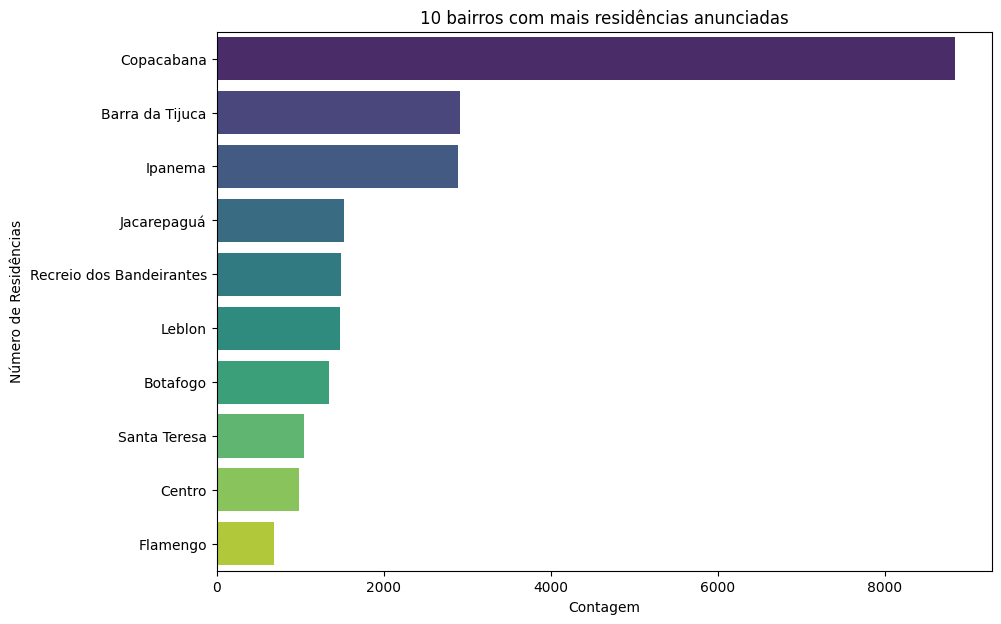

In [9]:
plt.figure(figsize=(10, 7))

sns.barplot(data=residencias_por_estado.sort_values('numeroResidencias', ascending=False).head(10), y='bairro', x='numeroResidencias', palette='viridis')

plt.ylabel('Número de Residências')
plt.xlabel('Contagem')
plt.title('10 bairros com mais residências anunciadas')

***Preço médio***

In [10]:
preco_por_estado = df.groupby('neighbourhood_cleansed')['price'].mean().astype(int).reset_index()
preco_por_estado.columns = ('bairro', 'precoMedio')
preco_por_estado.head(10)

,bairro,precoMedio
0,Abolição,465
1,Acari,250
2,Alto da Boa Vista,1115
3,Anchieta,1921
4,Andaraí,363
5,Anil,505
6,Bancários,223
7,Bangu,635
8,Barra da Tijuca,732
9,Barra de Guaratiba,417


Text(0.5, 0.98, 'Preço médio por bairro')

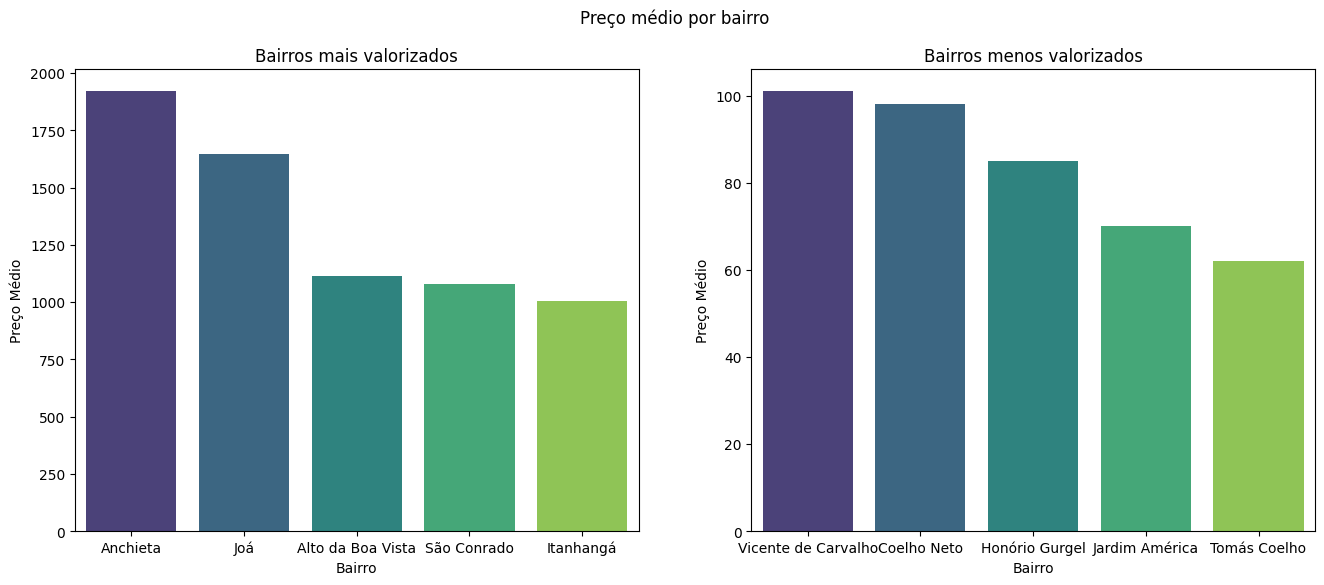

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=preco_por_estado.sort_values('precoMedio', ascending=False).head(),x='bairro', y='precoMedio', palette='viridis', ax=ax[0])

ax[0].set_title('Bairros mais valorizados')
ax[0].set_xlabel('Bairro')
ax[0].set_ylabel('Preço Médio')

sns.barplot(data=preco_por_estado.sort_values('precoMedio', ascending=False).tail(),x='bairro', y='precoMedio', palette='viridis', ax=ax[1])

ax[1].set_title('Bairros menos valorizados')
ax[1].set_xlabel('Bairro')
ax[1].set_ylabel('Preço Médio')

fig.suptitle('Preço médio por bairro')

***Disponibilidade média***

In [12]:
disponibilidade_por_estado = df.groupby('neighbourhood_cleansed')['availability_365'].mean().astype(int).reset_index()
disponibilidade_por_estado.columns = ('bairro', 'disponibilidade_diasAno')
disponibilidade_por_estado.head(10)

,bairro,disponibilidade_diasAno
0,Abolição,86
1,Acari,0
2,Alto da Boa Vista,277
3,Anchieta,273
4,Andaraí,285
5,Anil,282
6,Bancários,307
7,Bangu,340
8,Barra da Tijuca,219
9,Barra de Guaratiba,271


***Tipos de residências***

In [13]:
tipos_por_estado = df[['neighbourhood_cleansed', 'room_type']].value_counts().reset_index()

tipos_por_estado = tipos_por_estado.pivot_table(index='neighbourhood_cleansed', columns='room_type', values=0, fill_value=0).reset_index()
tipos_por_estado.columns = ('bairro', 'casasApartamentos', 'quartosHoteis', 'quartosPrivativos', 'quartosCompartilhados')
tipos_por_estado.head()

,bairro,casasApartamentos,quartosHoteis,quartosPrivativos,quartosCompartilhados
0,Abolição,1,0,0,1
1,Acari,1,0,0,0
2,Alto da Boa Vista,34,0,7,1
3,Anchieta,2,0,0,1
4,Andaraí,16,0,14,1


***Número de reviews***

In [14]:
contagem_reviews_estado = df.groupby('neighbourhood_cleansed')['number_of_reviews'].count().reset_index()
contagem_reviews_estado.columns = ('bairro', 'totalReviews')
contagem_reviews_estado.head()

,bairro,totalReviews
0,Abolição,2
1,Acari,1
2,Alto da Boa Vista,42
3,Anchieta,3
4,Andaraí,31


***Nota média de reviews***

In [15]:
reviews_por_estado = df.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().round(1).fillna('Sem reviews').reset_index()
reviews_por_estado.columns = ('bairro', 'nota')
reviews_por_estado

,bairro,nota
0,Abolição,Sem reviews
1,Acari,Sem reviews
2,Alto da Boa Vista,4.9
3,Anchieta,Sem reviews
4,Andaraí,4.8
...,...,...
148,Vila Militar,4.8
149,Vila Valqueire,4.7
150,Vila da Penha,4.9
151,Zumbi,4.8


***Latitude e longitude***

In [16]:
latlon_por_estado = df.groupby('neighbourhood_cleansed')[['latitude', 'longitude']].mean().reset_index()
latlon_por_estado.columns = ('bairro', 'latitude', 'longitude')
latlon_por_estado.head()

,bairro,latitude,longitude
0,Abolição,-22.886880,-43.297660
1,Acari,-22.814390,-43.333560
2,Alto da Boa Vista,-22.966873,-43.267739
3,Anchieta,-22.823819,-43.399365
4,Andaraí,-22.924232,-43.247810


***Merges***

In [17]:
df_por_estado = pd.merge(residencias_por_estado, preco_por_estado, on='bairro')
df_por_estado = pd.merge(df_por_estado, disponibilidade_por_estado, on='bairro')
df_por_estado = pd.merge(df_por_estado, tipos_por_estado, on='bairro')
df_por_estado = pd.merge(df_por_estado, reviews_por_estado, on='bairro')
df_por_estado = pd.merge(df_por_estado, latlon_por_estado, on='bairro')
df_por_estado = pd.merge(df_por_estado, contagem_reviews_estado, on='bairro')

In [18]:
df_por_estado.head()

,bairro,numeroResidencias,precoMedio,disponibilidade_diasAno,casasApartamentos,quartosHoteis,quartosPrivativos,quartosCompartilhados,nota,latitude,longitude,totalReviews
0,Abolição,2,465,86,1,0,0,1,Sem reviews,-22.886880,-43.297660,2
1,Acari,1,250,0,1,0,0,0,Sem reviews,-22.814390,-43.333560,1
2,Alto da Boa Vista,42,1115,277,34,0,7,1,4.9,-22.966873,-43.267739,42
3,Anchieta,3,1921,273,2,0,0,1,Sem reviews,-22.823819,-43.399365,3
4,Andaraí,31,363,285,16,0,14,1,4.8,-22.924232,-43.247810,31


***Mapa geográfico com as informações dos bairros***

In [33]:
import folium
mapa = folium.Map(location=[-22.90000, -43.40000], zoom_start=11) # Gerando mapa utilizando as coordenadas da cidade do Rio de Janeiro

for index, row in df_por_estado.iterrows(): # Criando a tooltip com todas a informações
  tooltip_text = f"""<strong>Bairro: {row['bairro']}<br>
  Preço Médio: ${row['precoMedio']}<br>
  Número de reviews: {row['totalReviews']}<br>
  Nota: {row['nota']}<br>
  Casas / Apartamentos: {row['casasApartamentos']}<br>
  Quartos de hotel: {row['quartosHoteis']}<br>
  Quartos privativos: {row['quartosPrivativos']}<br>
  Quartos compratilhados: {row['quartosCompartilhados']}</strong><br>"""

  price = row['precoMedio']
  if price < 300:  # Utilizando o preço médio como referência para definir a cor do ícone
      color = 'green'
  elif price < 600:
      color = 'orange'
  else:
      color = 'red'

  folium.Marker(location=[row['latitude'], row['longitude']], # Gerando o ícone
                icon=folium.Icon(icon_color='white', icon="home", prefix='fa', shadow=False, color=color),
                tooltip=folium.Tooltip(tooltip_text, sticky=True)).add_to(mapa)

mapa